In [1]:
import pandas as pd

In [2]:
import seaborn as sns

In [3]:
df = pd.read_csv("anscombes.csv", index_col= 0)

In [4]:
df

,dataset,x,y
id,,,
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84


<Axes: xlabel='x', ylabel='y'>

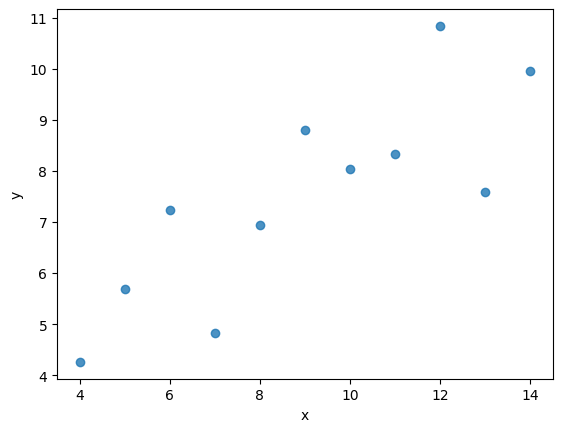

In [5]:
sns.regplot(data= df.loc[df.dataset == 'I'], x= 'x', y= 'y', fit_reg= False)

<Axes: xlabel='x', ylabel='y'>

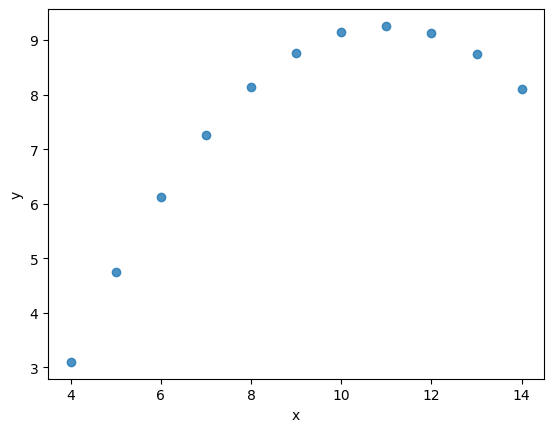

In [6]:
sns.regplot(data= df.loc[df.dataset == 'II'], x= 'x', y= 'y', fit_reg= False)

<Axes: xlabel='x', ylabel='y'>

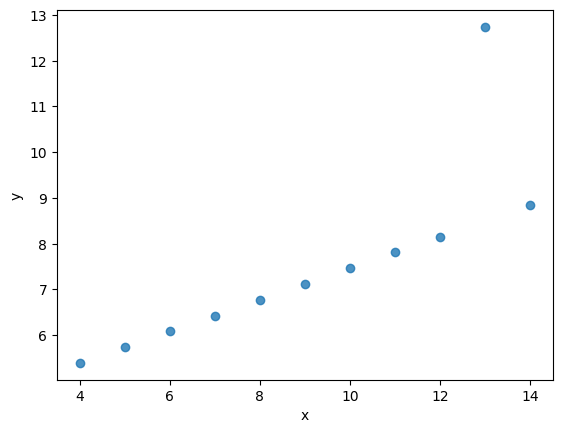

In [7]:
sns.regplot(data= df.loc[df.dataset == 'III'], x= 'x', y= 'y', fit_reg= False)

<Axes: xlabel='x', ylabel='y'>

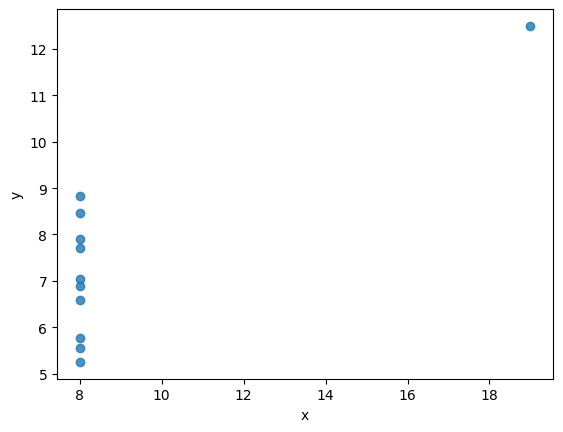

In [8]:
sns.regplot(data= df.loc[df.dataset == 'IV'], x= 'x', y= 'y', fit_reg= False)

In [9]:
pd.DataFrame.corr?

Signature:
pd.DataFrame.corr(
    self,
    method: 'CorrelationMethod' = 'pearson',
    min_periods: 'int' = 1,
    numeric_only: 'bool' = False,
) -> 'DataFrame'
Docstring:
Compute pairwise correlation of columns, excluding NA/null values.

Parameters
----------
method : {'pearson', 'kendall', 'spearman'} or callable
    Method of correlation:

    * pearson : standard correlation coefficient
    * kendall : Kendall Tau correlation coefficient
    * spearman : Spearman rank correlation
    * callable: callable with input two 1d ndarrays
        and returning a float. Note that the returned matrix from corr
        will have 1 along the diagonals and will be symmetric
        regardless of the callable's behavior.
min_periods : int, optional
    Minimum number of observations required per pair of columns
    to have a valid result. Currently only available for Pearson
    and Spearman correlation.
numeric_only : bool, default False
    Include only `float`, `int` or `boolean` data.

 

In [10]:
df.head()

,dataset,x,y
id,,,
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44 entries, 0 to 43
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dataset  44 non-null     object 
 1   x        44 non-null     float64
 2   y        44 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.4+ KB


In [12]:
numeric_data_I = df[df.dataset == 'I'].select_dtypes(exclude= 'object')
numeric_data_II = df[df.dataset == 'II'].select_dtypes(exclude= 'object')
numeric_data_III = df[df.dataset == 'III'].select_dtypes(exclude= 'object')
numeric_data_IV = df[df.dataset == 'IV'].select_dtypes(exclude= 'object')

# Pearson correlation 

Even if we get a higher (it can be also negative for negative correlation but still be considered high) value of pearson correlation coefficient we still cannot conclude whether the graph is linear or not. In the below example it is showing that all 4 dataset has the same coefficient (almost) but the II dataset is not linear.

In [13]:
numeric_data_I.corr()

,x,y
x,1.000000,0.816421
y,0.816421,1.000000


In [14]:
numeric_data_II.corr()

,x,y
x,1.000000,0.816237
y,0.816237,1.000000


In [15]:
numeric_data_III.corr()

,x,y
x,1.000000,0.816287
y,0.816287,1.000000


In [16]:
numeric_data_IV.corr()

,x,y
x,1.000000,0.816521
y,0.816521,1.000000


# Spearman Rank Correlation

In the spearman we're getting different values for all the datasets and for linear datasets we're getting a higher value and for II dataset (non-linear) the value is less which means that it is a non linear.

In [17]:
numeric_data_I.corr(method= 'spearman')

,x,y
x,1.000000,0.818182
y,0.818182,1.000000


In [18]:
numeric_data_II.corr(method= 'spearman')

,x,y
x,1.000000,0.690909
y,0.690909,1.000000


In [19]:
numeric_data_III.corr(method= 'spearman')

,x,y
x,1.000000,0.990909
y,0.990909,1.000000


In [20]:
numeric_data_IV.corr(method= 'spearman')

,x,y
x,1.0,0.5
y,0.5,1.0


# Kendall Rank Correlation

For the I dataset the coefficient is higher then 0.5 (mean value) which means it is a linear association for the II dataset the value is very near to 0.5 which means it is non linear, for III dataset the value is extremely close to +1 which means higher association and complete linear, for the IV dataset for the same value of x there are different values of y.

In [21]:
numeric_data_I.corr(method= 'kendall')

,x,y
x,1.000000,0.636364
y,0.636364,1.000000


In [22]:
numeric_data_II.corr(method= 'kendall')

,x,y
x,1.000000,0.563636
y,0.563636,1.000000


In [23]:
numeric_data_III.corr(method= 'kendall')

,x,y
x,1.000000,0.963636
y,0.963636,1.000000


In [24]:
numeric_data_IV.corr(method= 'kendall')

,x,y
x,1.000000,0.426401
y,0.426401,1.000000
